In [316]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime as dt


In [317]:
stx = pd.read_csv('data/prices.csv')
stx.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [318]:

stx.keys()

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [319]:
stx.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [320]:

sybl = stx.loc[stx["symbol"] == 'AAPL']
sybl["year"] = pd.DatetimeIndex(sybl["date"]).year
sybl["month"] = pd.DatetimeIndex(sybl["date"]).month
sybl["month_two"] = pd.DatetimeIndex(sybl["date"]).month
sybl["day"] = pd.DatetimeIndex(sybl["date"]).day
sybl["diff"] = sybl["open"]-sybl["close"]
sybl = sybl.loc[sybl["year"] == 2010]
sybl_year = sybl[["month_two", "month", "open", "close", "diff"]].groupby(["month_two"]).mean()

sybl_year


,month,open,close,diff
month_two,,,,
1,1,209.409473,207.715263,1.694210
2,2,198.092105,198.795788,-0.703684
3,3,222.796957,223.410870,-0.613912
4,4,251.001430,251.148574,-0.147143
5,5,251.979500,251.461498,0.518002
6,6,262.385911,261.145454,1.240457
7,7,255.479523,254.949999,0.529523
8,8,251.610456,251.323184,0.287272
9,9,272.840950,273.850950,-1.010000


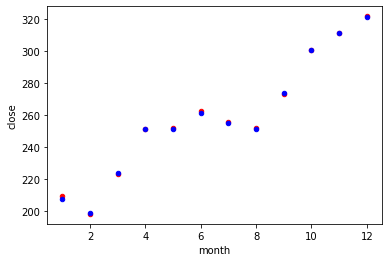

In [321]:
ax = plt.gca()
sybl_year.plot(kind='scatter',x='month',y='open',color='red', ax=ax)
sybl_year.plot(kind='scatter',x='month',y='close',color='blue', ax=ax)
plt.show()

In [334]:
x = sybl_year["month"].values
y = sybl_year["diff"].values

y_train, y_test = train_test_split(y, train_size=0.8, test_size=0.2, random_state=100)
y_train

array([ 1.24045673,  0.5180025 , -0.61391222,  1.69421   , -0.14142738,
        0.28727205, -0.14714319,  0.32545118, -1.00999967])

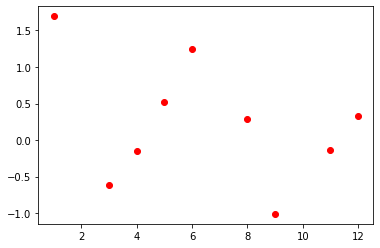

In [339]:
plt.scatter(x_train, y_train, color='red')